In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


In [11]:
# Sampling
sample_size = 200000
df_sample = df.sample(n=sample_size, random_state=42)

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_sample.drop('MENTHLTH', axis=1)
y = df_sample['MENTHLTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the number of top features to select
k = 20

# select k best features using ANOVA F-test
selector = SelectKBest(f_classif, k=k)

# fit selector on training data and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = X_train.columns[selected_features_indices]

# train logistic regression model using the selected features
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train_selected, y_train, cv=5)

# print the mean cross-validation score
print("Cross-validation accuracy:", scores.mean())

# fit the model on the selected features
logreg.fit(X_train_selected, y_train)

# get the coefficients of the logistic regression model
coefficients = logreg.coef_

# print the feature importances
for feature_name, importance in zip(selected_features_names, coefficients[0]):
    print(feature_name, importance)

Cross-validation accuracy: 0.6863187500000001


LogisticRegression()

SEX 0.0010721165819763815
MARITAL -0.0005733749744318451
EDUCA 0.005977882756929385
_INCOMG 0.007101990923167721
_BMI5 0.0017759437340745306
_AGEG5YR 0.018072462565730873
GENHLTH -0.001834783969518276
EXERANY2 0.0008019496590810875
EXRACT21 0.012345003708448833
ALCDAY5 0.00122123907767277
_RFBING5 0.0007252470626954224
DRNKANY5 0.001799184764149609
FRUIT1 0.00048389296687395686
FVGREEN 0.0016834209633830022
_FRTLT1 0.0005325900135787223
SMOKE100 0.002190946226615088
SMOKDAY2 0.0038947461431163496
_SMOKER3 0.002535895482551846
_RFSMOK3 0.0005851742664666475
PHYSHLTH -0.028743583112686436


There are many feature selection techniques available, each with their own strengths and weaknesses. Here is an example of using the mutual information feature selection technique to select the most important features for clustering

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df_sample.drop('DIABETE3', axis=1)
y = df_sample['DIABETE3']

In [14]:
# Select top k features using mutual information score
k = 10
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(score_func=<function mutual_info_classif at 0x000001C90003A8B0>)

In [15]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['_AGEG5YR', 'GENHLTH', '_RFDRHV5', 'BPHIGH4', 'TOLDHI2', 'CVDINFR4',
       'CVDCRHD4', 'CVDSTRK3', '_MICHD', 'CHCSCNCR'],
      dtype='object')


One method for feature selection that you could use is Recursive Feature Elimination (RFE). RFE works by recursively removing features from the dataset and building a model on the remaining features until a desired number of features is reached.

In [4]:
# Sampling
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)

In [16]:
X = df_sample.drop(columns=['MENTHLTH'])
y = df_sample['MENTHLTH']

In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Define the estimator for the RFE
rf = RandomForestClassifier(n_estimators=100)

# Define the RFE model with 5 features
rfe = RFE(estimator=rf, n_features_to_select=20)

In [18]:
# Fit the RFE model to the data
rfe.fit(X, y)

KeyboardInterrupt: 

In [ ]:
# Print the selected features
print(X.columns[rfe.support_])

Index(['Patient_ID', 'WEIGHT2', 'HEIGHT3', '_BMI5', '_AGEG5YR', 'GENHLTH',
       '_DRNKWEK', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1',
       'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', '_FRUTSUM', '_VEGESUM',
       'BPHIGH4', 'PHYSHLTH'],
      dtype='object')


feature selection using Recursive Feature Elimination (RFE) with cross-validation::

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X = df.drop('MENTHLTH', axis=1)
y = df['MENTHLTH']
# Define the model to use for feature selection
estimator = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)

# Define the feature selection method
selector = RFE(estimator, n_features_to_select=20)

# Define the cross-validation method
cv = StratifiedKFold(n_splits=10)



In [ ]:
# Fit the feature selection method to the data
selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]

# Print the selected features
print("Selected features: ", selected_features.tolist())

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X = df.drop('MENTHLTH', axis=1)
y = df['MENTHLTH']

# Define logistic regression model with L1 regularization
lr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, multi_class='auto')

# Use cross-validation to select features with highest coefficient
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sfm = SelectFromModel(lr_model, threshold=-np.inf, max_features=10)
X_selected = sfm.fit_transform(X, y)

In [13]:
for train_index, test_index in cv.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model on training data
    lr_model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = lr_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    auc = roc_auc_score(y_test, y_pred)

    # Print results
    print(f'ROC AUC score: {auc:.3f}')

LogisticRegression(multi_class='ovr', penalty='l1', random_state=42,
                   solver='liblinear')

ValueError: multi_class must be in ('ovo', 'ovr')

### Clustering 1: SEX, EXERANY2, AVEDRNK2

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

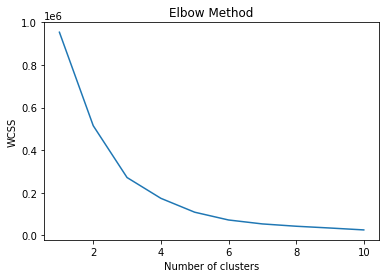

In [14]:
features = ['SEX','EXERANY2','AVEDRNK2']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

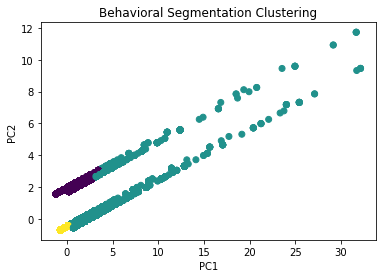

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()#

In [16]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 106374
Cluster 1: 150953
Cluster 2: 184129

Cluster Means:
              SEX  EXERANY2  AVEDRNK2
cluster                              
0        1.613430  2.000000  1.384586
1        1.034024  1.007088  2.047088
2        2.000000  1.000000  1.209799


### Clustering 2: SEX, EXRACT11, AVEDRNK2

In [17]:
features = ['SEX','EXRACT11','AVEDRNK2']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [18]:
#kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [19]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 156752
Cluster 1: 214059
Cluster 2: 70645

Cluster Means:
              SEX   EXRACT11  AVEDRNK2
cluster                               
0        1.041658  58.168463  2.065651
1        2.000000  58.532719  1.177456
2        1.480275  15.551150  1.461066


### Clustering 3: SEX, EXEROFT1, AVEDRNK2

In [20]:
#features = ['SEX','EXEROFT1','AVEDRNK2']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [22]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 156752
Cluster 1: 214059
Cluster 2: 70645

Cluster Means:
              SEX   EXRACT11  AVEDRNK2
cluster                               
0        1.041658  58.168463  2.065651
1        2.000000  58.532719  1.177456
2        1.480275  15.551150  1.461066


### Clustering 4: SEX, EXEROFT1, ALCDAY5

In [23]:
features = ['SEX','EXEROFT1','ALCDAY5']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [25]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 148580
Cluster 1: 209163
Cluster 2: 83713

Cluster Means:
              SEX    EXEROFT1     ALCDAY5
cluster                                  
0        2.000000  103.683618   16.173617
1        1.301172  103.669822  127.715026
2        1.512991  215.565062  105.611578


### Clustering 5: SEX, EXEROFT1, ALCDAY5

In [26]:
features = ['SEX','EXEROFT1','MAXDRNKS']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [28]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 203486
Cluster 1: 155996
Cluster 2: 81974

Cluster Means:
              SEX    EXEROFT1  MAXDRNKS
cluster                                
0        2.000000  103.687438  1.971531
1        1.052521  104.846765  3.302758
2        1.522593  215.680374  2.478457


### Clustering 6: SEX, MARITAL, EXEROFT1, ALCDAY5

In [29]:
features = ['SEX','MARITAL','EXEROFT1','MAXDRNKS']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [31]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 171416
Cluster 1: 82631
Cluster 2: 170311
Cluster 3: 17098

Cluster Means:
              SEX   MARITAL    EXEROFT1   MAXDRNKS
cluster                                           
0        1.220534  1.421518  150.963381   2.375140
1        1.546889  4.739359  110.311590   2.427116
2        2.000000  1.628861  104.458168   1.963666
3        1.071002  3.616388  137.544157  10.377763


### Clustering 7: SEX, MARITAL, EXEROFT1, ALCDAY5,CVDINFR4(heart attack)

In [32]:
features = ['SEX','MARITAL','EXEROFT1','MAXDRNKS','CVDINFR4']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [34]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 72866
Cluster 1: 173638
Cluster 2: 174994
Cluster 3: 19958

Cluster Means:
              SEX   MARITAL    EXEROFT1  MAXDRNKS  CVDINFR4
cluster                                                    
0        1.631955  4.890374  113.506382  2.366248  2.136154
1        2.000000  1.644628  106.394401  1.953605  1.948260
2        1.191338  1.473119  146.190178  2.381796  1.908814
3        1.067592  3.749674  140.671911  9.576410  1.986872


### Clustering 8: SEX, MARITAL, EXEROFT1, ALCDAY5,CVDINFR4(heart attack) ,SMOKDAY2

In [35]:
#features = ['SEX','MARITAL','EXEROFT1','MAXDRNKS','CVDINFR4','SMOKDAY2']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [37]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

Cluster Sizes:
Cluster 0: 72866
Cluster 1: 173638
Cluster 2: 174994
Cluster 3: 19958

Cluster Means:
              SEX   MARITAL    EXEROFT1  MAXDRNKS  CVDINFR4
cluster                                                    
0        1.631955  4.890374  113.506382  2.366248  2.136154
1        2.000000  1.644628  106.394401  1.953605  1.948260
2        1.191338  1.473119  146.190178  2.381796  1.908814
3        1.067592  3.749674  140.671911  9.576410  1.986872


### Clustering 9: _BMI5, _AGEG5YR, SEX, MARITAL, EXEROFT1, ALCDAY5,CVDINFR4(heart attack) ,SMOKDAY2, PHYSHLTH, CVDCRHD4, CVDSTRK3, _MICHD

* CVDINFR4: you had a heart attack, also called a myocardial infarction? 
* SMOKDAY2:
* CVDCRHD4: you had angina or coronary heart disease? 
* CVDSTRK3: you had a stroke ?
* _MICHD:  have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [38]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','CVDINFR4','SMOKDAY2','PHYSHLTH','CVDCRHD4','CVDSTRK3','_MICHD']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [40]:
## Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
#    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
#    profile.to_file(f"clustering9_{i}_profile.html")

Cluster Sizes:
Cluster 0: 173281
Cluster 1: 206438
Cluster 2: 61737

Cluster Means:
              SEX   MARITAL    EXEROFT1  MAXDRNKS  CVDINFR4
cluster                                                    
0        1.223591  1.371420  145.382125  2.297615  1.882815
1        1.999123  2.245095  107.092163  2.001521  1.988733
2        1.154154  4.428803  126.908483  4.992824  2.119053


### Clustering 10: _BMI5, _AGEG5YR, SEX, MARITAL, EXEROFT1, VEGETAB1, FRUIT1, ALCDAY5, SMOKDAY2, PHYSHLTH, DIABETE3

In [41]:
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','DIABETE3']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [43]:
## Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
#    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
#    profile.to_file(f"clustering10_{i}_profile.html")

Cluster Sizes:
Cluster 0: 216677
Cluster 1: 97927
Cluster 2: 126852

Cluster Means:
               _BMI5       SEX  _AGEG5YR   MARITAL    EXEROFT1  MAXDRNKS  \
cluster                                                                    
0        2694.762379  1.702188  8.282554  1.843957  114.693244  2.059716   
1        2694.768867  1.333452  4.441135  3.462406  133.961573  4.200762   
2        3075.757372  1.549585  9.581323  1.859876  135.314839  2.064642   

         SMOKDAY2  PHYSHLTH    VEGETAB1      FRUIT1  DIABETE3  
cluster                                                        
0        2.912547  2.227075  152.701293  133.387595  2.905025  
1        2.388228  2.178837  248.895381  251.084114  2.997549  
2        2.792624  9.121827  272.472227  265.502948  2.293578  


### Clustering 11: _BMI5, _AGEG5YR, SEX, MARITAL, EXEROFT1, VEGETAB1, FRUIT1, ALCDAY5, SMOKDAY2, PHYSHLTH, CHCSCNCR

In [44]:
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','CHCSCNCR']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])


In [45]:

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [47]:
## Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
#    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
#    profile.to_file(f"clustering11_{i}_profile.html")

Cluster Sizes:
Cluster 0: 89871
Cluster 1: 130672
Cluster 2: 220913

Cluster Means:
               _BMI5       SEX  _AGEG5YR   MARITAL    EXEROFT1  MAXDRNKS  \
cluster                                                                    
0        2751.720111  1.399339  3.683624  3.965361  122.804865  4.186389   
1        2911.088955  1.481718  9.081869  1.822280  145.477593  2.269293   
2        2762.408635  1.704721  8.723611  1.720329  113.566685  2.022502   

         SMOKDAY2  PHYSHLTH    VEGETAB1      FRUIT1  CHCSCNCR  
cluster                                                        
0        2.419223  2.425710  213.189750  210.615749  1.997330  
1        2.728128  6.859327  297.122138  294.558811  1.839598  
2        2.921041  3.343950  154.083114  134.671482  1.906859  


In [48]:
# Identify the cluster with the highest proportion of patients with mental issues
cluster_mental_issues = pd.DataFrame(daf.groupby(kmeans.labels_)['CHCSCNCR'].mean())
cluster_mental_issues = cluster_mental_issues.sort_values(by='CHCSCNCR', ascending=False).head(1)
mental_issues_cluster_label = cluster_mental_issues.index[0]

# Make a prediction for a new patient
new_patient = pd.DataFrame({'_BMI5': [2204.0], 'SEX': [1.0], 'MARITAL': [1.0], '_AGEG5YR': [2.0], 'EXEROFT1': [103.0], 'ALCDAY5' :[101.0], 'SMOKDAY2' :[1.0],'PHYSHLTH' :[15.0],'VEGETAB1' :[201.0],'FRUIT1' :[101.0], 'CHCSCNCR': [0]})
new_data_pca = pca.transform(new_patient)
# Predict the cluster label for the new patient
new_patient_cluster = kmeans.predict(new_data_pca)

# Check if the new patient is more likely to develop cancer based on the identified cluster
if new_patient_cluster == mental_issues_cluster_label:
    print("This patient is more likely to develop cancer.")
else:
    print("This patient is not more likely to develop cancer.")

This patient is not more likely to develop cancer.


### Clustering 12: _BMI5, _AGEG5YR, SEX, MARITAL, EXEROFT1, VEGETAB1, FRUIT1, ALCDAY5, SMOKDAY2, PHYSHLTH, MENTHLTH, _INCOMG, EDUCA, GENHLTH

In [49]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
features = ['GENHLTH', '_RFDRHV5', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD','SMOKDAY2', '_SMOKER3', '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2','PC3'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

# Visualize the clusters
#plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('Behavioral Segmentation Clustering')
#plt.show()

In [51]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
#    cluster = clustered_data.loc[clustered_data['cluster'] == i]
#    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
#    profile.to_file(f"clustering12_{i}_profile.html")

Cluster Sizes:
Cluster 0: 58376
Cluster 1: 347820
Cluster 2: 35260

Cluster Means:
          GENHLTH  _RFDRHV5  CVDINFR4  CVDCRHD4  CVDSTRK3    _MICHD  SMOKDAY2  \
cluster                                                                         
0        2.881064  1.107527  1.985576  1.993199  1.975367  1.949089  1.289417   
1        2.432301  1.042657  2.023981  1.999117  1.983615  1.998847  3.000000   
2        3.427595  1.026971  1.353914  1.302723  1.846795  1.000000  2.849490   

         _SMOKER3  _RFSMOK3  PHYSHLTH  
cluster                                
0        1.000000  2.000000  5.868850  
1        2.000000  1.000000  3.423288  
2        1.909104  1.090896  9.068548  


In [52]:
#cluster_labels = kmeans.labels_
#print(cluster_labels)
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
#scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=cluster_labels, cmap='rainbow', alpha=0.5)

# Setting labels for the plot
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')

# Adding a colorbar
#plt.colorbar(scatter)

# Displaying the plot
#plt.show()

In [53]:
#import plotly.express as px

#fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=cluster_labels.astype(str))
#fig.update_layout(scene=dict(camera=dict(up=dict(x=0, y=0, z=1),
#                                          center=dict(x=0, y=0, z=0),
#                                         eye=dict(x=2, y=2, z=0.5))))
#fig.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('MENTHLTH', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")


KeyError: "['MENTHLTH'] not found in axis"

In [ ]:
features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=3)
#df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2','PC3'])

# Determine the optimal number of clusters using elbow method
wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#    kmeans.fit(df_pca)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()


In [ ]:
# Train a KMeans model with 4 clusters
#kmeans = KMeans(n_clusters=4, random_state=0).fit(df_pca)

In [ ]:
# Identify the cluster with the highest proportion of patients with mental issues
#cluster_mental_issues = pd.DataFrame(daf.groupby(kmeans.labels_)['MENTHLTH'].mean())
#cluster_mental_issues = cluster_mental_issues.sort_values(by='MENTHLTH', ascending=False).head(1)
#mental_issues_cluster_label = cluster_mental_issues.index[0]

# Make a prediction for a new patient
#new_patient = pd.DataFrame({'_BMI5': [2204.0], 'SEX': [1.0], 'MARITAL': [1.0], '_AGEG5YR': [2.0], 'EXEROFT1': [103.0], 'MAXDRNKS' :[2.0],'SMOKDAY2' :[1.0],'PHYSHLTH' :[15.0],'VEGETAB1' :[201.0],'FRUIT1' :[101.0],'GENHLTH' :[3.0],'EDUCA' :[5],'_INCOMG' :[2], 'MENTHLTH': [0]})
#new_data_pca = pca.transform(new_patient)
# Predict the cluster label for the new patient
#new_patient_cluster = kmeans.predict(new_data_pca)

# Check if the new patient is more likely to develop mental issues based on the identified cluster
#if new_patient_cluster == mental_issues_cluster_label:
#    print("This patient is more likely to develop mental issues.")
#else:
#    print("This patient is not more likely to develop mental issues.")
